In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels


In [3]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


In [5]:
# Train the classifier on the training data
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test data
y_pred = random_forest.predict(X_test)


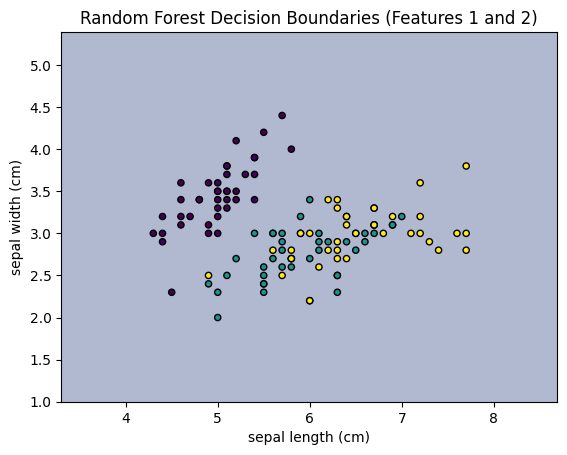

In [9]:
# Create a mesh grid for the decision boundary plot using all four features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
mesh_grid = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]  # Create a mesh grid with four columns
Z = random_forest.predict(mesh_grid)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries using the first two features
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Random Forest Decision Boundaries (Features 1 and 2)")
plt.show()

In [10]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

